In [2]:
import pandas as pd
from significance_analysis import dataframe_validator,model,seed_dependency_check, benchmark_information_check, fidelity_check, metafeature_analysis, cd_diagram

# Load example dataset
data = pd.read_parquet("datasets/priorband_data.parquet")

Firstly, we analyze the dataset for compatibility with our methods and if necessary convert columns to another data type.

In [3]:
data = dataframe_validator(data)[0]

Converted column seed to object.


We demonstrate our sanity checks with LMEM-based hypothesis testing.

In [4]:
# We check the dependency of the performances on the random seed

seed_dependency_check(data)

value~algorithm (-269924.2443) >> value~(0+algorithm|seed) (-269958.1791)
Chi-Square: 67.86948838911485, P-Value: 1.7763568394002505e-15
=> Seed is not a significant effect


[]

In [5]:
# For each benchmark, we check if the performances are significantly different

benchmark_information_check(data)


Benchmark: LC-167190
value~1 (12884.4064) << value~algorithm (13113.7332)
Chi-Square: 458.65341885616, P-Value: 0.0
=> Benchmark LC-167190    is informative.

Benchmark: JAHS-C10
value~1 (-25493.0466) << value~algorithm (-25478.2102)
Chi-Square: 29.672838636499364, P-Value: 3.602673946945245e-07
=> Benchmark JAHS-C10     is informative.

Benchmark: LC-126026
value~1 (12683.8569) << value~algorithm (12721.7273)
Chi-Square: 75.74078563572402, P-Value: 0.0
=> Benchmark LC-126026    is informative.

Benchmark: PD1-Cifar100
value~1 (3718.3627) << value~algorithm (3738.4751)
Chi-Square: 40.224876708227384, P-Value: 1.8419549219217402e-09
=> Benchmark PD1-Cifar100 is informative.

Benchmark: PD1-ImageNet
value~1 (5462.3515) << value~algorithm (5583.9874)
Chi-Square: 243.2717470523712, P-Value: 0.0
=> Benchmark PD1-ImageNet is informative.

Benchmark: LC-168330
value~1 (10267.6418) << value~algorithm (10362.9098)
Chi-Square: 190.53600217378698, P-Value: 0.0
=> Benchmark LC-168330    is inform

{'LC-167190': True,
 'JAHS-C10': True,
 'LC-126026': True,
 'PD1-Cifar100': True,
 'PD1-ImageNet': True,
 'LC-168330': True,
 'JAHS-CH': True,
 'LC-168910': True,
 'PD1-LM1B': True,
 'PD1-WMT': True,
 'JAHS-FM': True,
 'LC-189906': True}

In [6]:
# For model building, we check wether a fidelity increases the model's ability to predict the performance

fidelity_check(data)

value~algorithm+(1|benchmark) (-244290.1072) << value~algorithm+(1|benchmark)+used_fidelity (-243312.5612)
Chi-Square: 1955.0920213969657, P-Value: 0.0

value~algorithm+(1|benchmark) (-244290.1072) << value~algorithm+(1|benchmark)+algorithm:used_fidelity (-243001.2452)
Chi-Square: 2577.7240843258332, P-Value: 0.0

value~algorithm+(1|benchmark)+used_fidelity (-243312.5612) << value~algorithm+(1|benchmark)+algorithm:used_fidelity (-243001.2452)
Chi-Square: 622.6320629288675, P-Value: 0.0

=> Fidelity used_fidelity is both as simple and interaction effect significant, but interaction effect performs better.


Using the built model, we can now conduct performance analysis with a few simple calls.

P-values adjusted by tukey method for family of 3 estimates



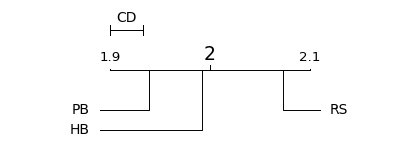

In [7]:
# We use the data of all benchmarks combined, at 10x budget
df=data.loc[data["used_fidelity"]==10]

# Creating the model and running post-hoc analysis using the tukey HSD test
mod=model("value ~ algorithm + (1|benchmark) + prior",df)
post_hoc_results=mod.post_hoc("algorithm")

# Plotting the results
cd_diagram(post_hoc_results)

print("")

     benchmark_variant  wins  fidelity     benchmark metafeature
0      LC-167190 x bad  -1.0       1.0     LC-167190         bad
1      JAHS-C10 x at25   1.0       1.0      JAHS-C10        at25
2      LC-126026 x bad  -1.0       1.0     LC-126026         bad
3  PD1-Cifar100 x at25   1.0       1.0  PD1-Cifar100        at25
4  PD1-ImageNet x at25   1.0       1.0  PD1-ImageNet        at25
P-values adjusted by tukey method for family of 276 estimates


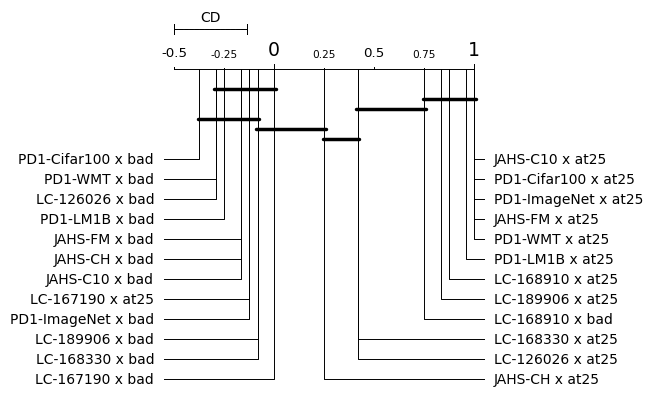

In [8]:
scores = metafeature_analysis(data,("HB","PB"),"prior")